## Условие 1:
### Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы



### 1.1. 
Скачать данные (недвижимость)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('kc-house-data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503



### 1.2
Изучите стоимости недвижимости

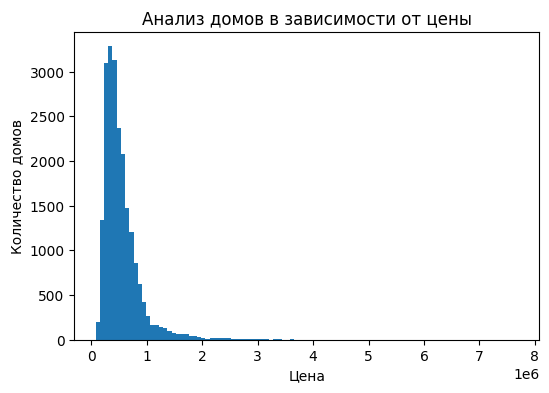

In [11]:
plt.figure(figsize=(6, 4))
plt.hist(df['price'], bins=100)
plt.title('Анализ домов в зависимости от цены')
plt.xlabel('Цена')
plt.ylabel('Количество домов');

Большая часть домов стоит до 1000000


### 1.3
Изучите распределение квадратуры жилой

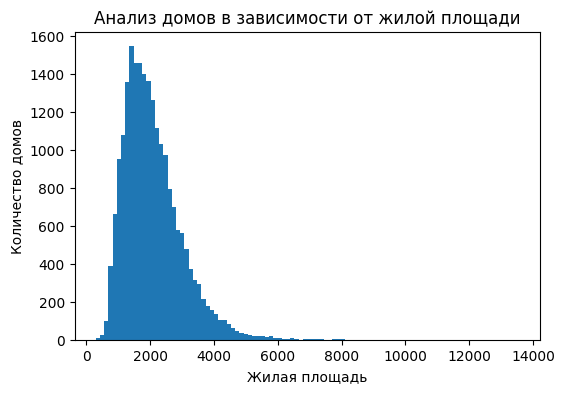

In [12]:
plt.figure(figsize=(6, 4))
plt.hist(df['sqft_living'], bins=100)
plt.title('Анализ домов в зависимости от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество домов');

Жилая площадь большинства домов лежит в интервале 0 - 4000

### 1.4 
Изучите распределение года постройки

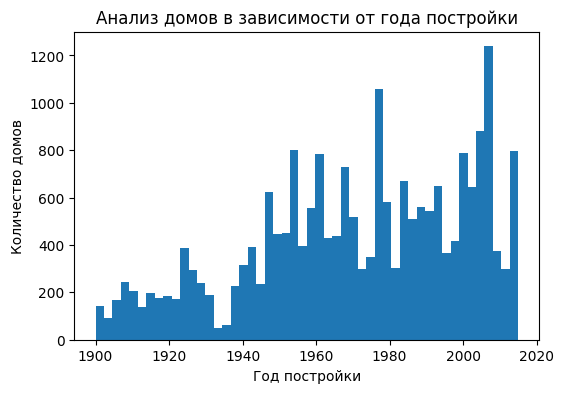

In [14]:
plt.figure(figsize=(6, 4))
plt.hist(df['yr_built'], bins=50)
plt.title('Анализ домов в зависимости от года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов');

Новых домов больше. 

Мало домов построено примерно с 1932 по 1937, что, возможно, связано с великой депрессией в США.

## Условие 2: 
### 2 задача

### 2.1 
Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

In [19]:
waterfront = df["waterfront"].value_counts()
waterfront.head()

0    21450
1      163
Name: waterfront, dtype: int64

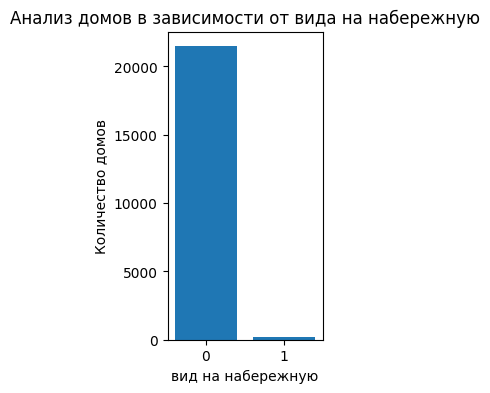

In [21]:
plt.figure(figsize=(2, 4))
plt.bar(waterfront.index, waterfront.values)
plt.title('Анализ домов в зависимости от вида на набережную')
plt.xlabel('вид на набережную')
plt.ylabel('Количество домов');

Всего 163 дома имеют вид на набережную, остальные 21450 - нет.


### 2.2
 Изучите распределение этажей домов

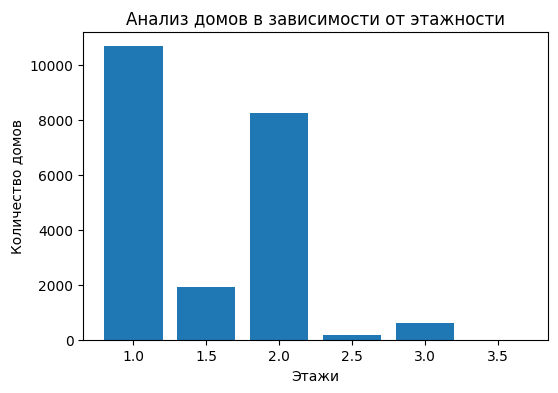

In [28]:
plt.figure(figsize=(6, 4))
plt.bar(df['floors'].value_counts().index, df['floors'].value_counts().values, width=0.4)
plt.title('Анализ домов в зависимости от этажности')
plt.xlabel('Этажи')
plt.ylabel('Количество домов');

Больше всего одноэтажных и двухэтажных домов.

### 2.3 
Изучите распределение состояния домов

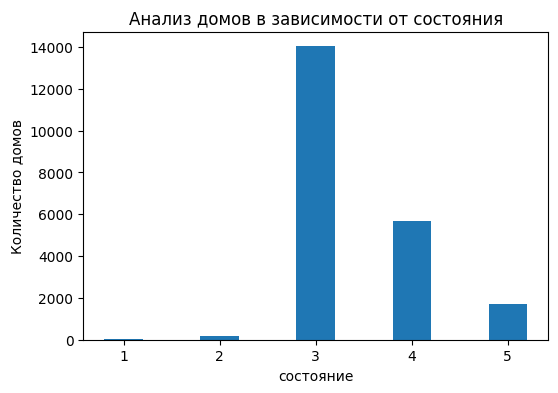

In [32]:
plt.figure(figsize=(6, 4))
plt.bar(df['condition'].value_counts().index, df['condition'].value_counts().values, width=0.4)
plt.title('Анализ домов в зависимости от состояния')
plt.xlabel('состояние')
plt.ylabel('Количество домов');

Большинство домов в удовлетворительном состоянии или лучше, домов в плохом состоянии почти нет.

## Условие 3: 
### 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [37]:
corr_matrix = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built']].corr()
corr_matrix

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built
price,1.00,0.31,0.53,0.70,0.26,0.27,0.40,0.04,0.67,0.05
bedrooms,0.31,1.00,0.52,0.58,0.18,-0.01,0.08,0.03,0.36,0.15
bathrooms,0.53,0.52,1.00,0.75,0.50,0.06,0.19,-0.12,0.66,0.51
sqft_living,0.70,0.58,0.75,1.00,0.35,0.10,0.28,-0.06,0.76,0.32
floors,0.26,0.18,0.50,0.35,1.00,0.02,0.03,-0.26,0.46,0.49
waterfront,0.27,-0.01,0.06,0.10,0.02,1.00,0.40,0.02,0.08,-0.03
view,0.40,0.08,0.19,0.28,0.03,0.40,1.00,0.05,0.25,-0.05
condition,0.04,0.03,-0.12,-0.06,-0.26,0.02,0.05,1.00,-0.14,-0.36
grade,0.67,0.36,0.66,0.76,0.46,0.08,0.25,-0.14,1.00,0.45
yr_built,0.05,0.15,0.51,0.32,0.49,-0.03,-0.05,-0.36,0.45,1.00


<Axes: >

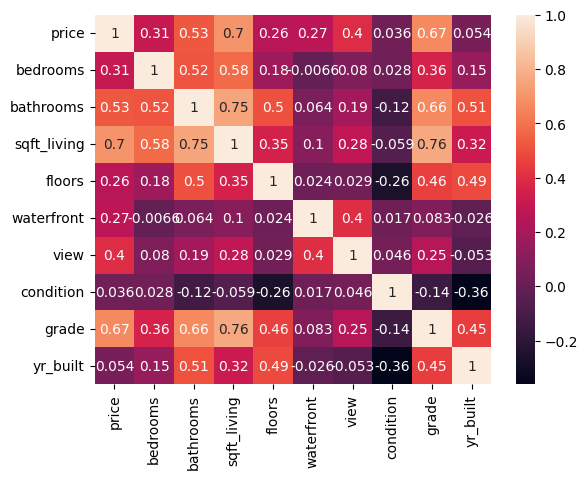

In [42]:
sns.heatmap(corr_matrix, annot=True);

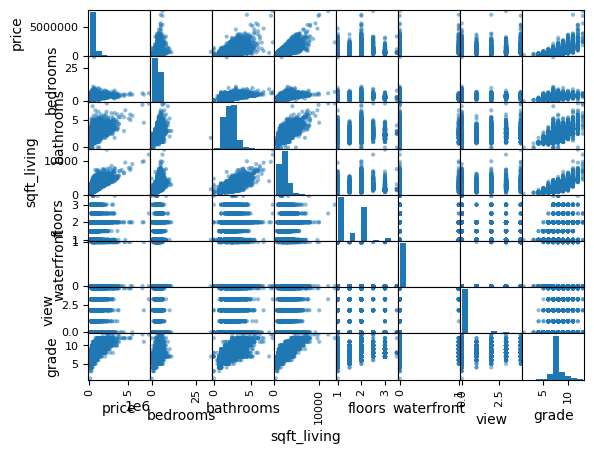

In [46]:
pd.plotting.scatter_matrix(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade']]);

На цену линейно влияет: жилая площадь, оценка. Слабо линейно влияет: количество ванн, вид из окна. Очень слабо линейно влияют: количество спален, этажей, вид на набережную. Почти нет линейной зависимости цены с годом постройки и состоянием.

### Наиболее влияющие на цену факторы:

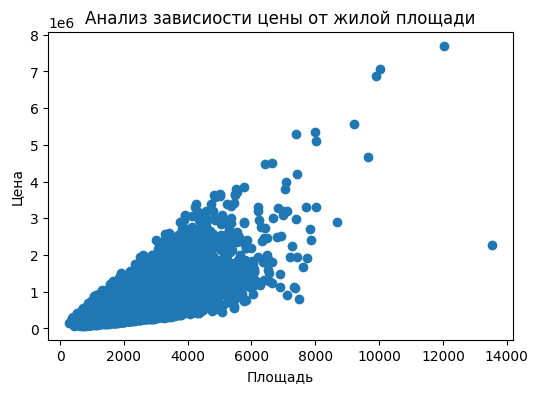

In [48]:
plt.figure(figsize=(6, 4))
plt.scatter(df['sqft_living'], df['price'])
plt.title('Анализ зависиости цены от жилой площади')
plt.xlabel('Площадь')
plt.ylabel('Цена');

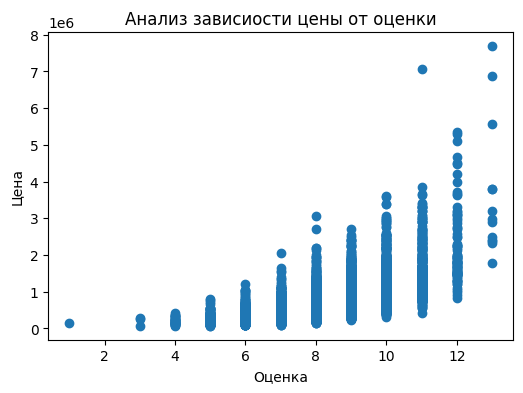

In [55]:
plt.figure(figsize=(6, 4))
plt.scatter(df['grade'], df['price'])
plt.title('Анализ зависиости цены от оценки')
plt.xlabel('Оценка')
plt.ylabel('Цена');

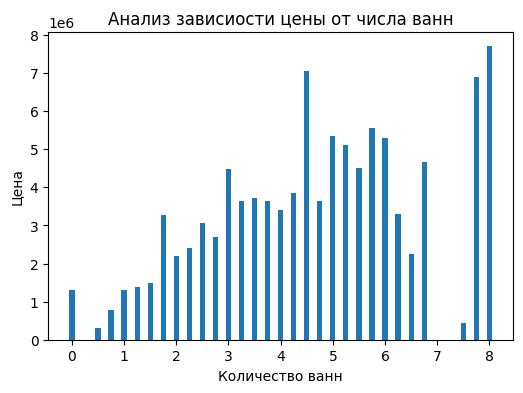

In [56]:
plt.figure(figsize=(6, 4))
plt.bar(df['bathrooms'], df['price'], width=0.1)
plt.title('Анализ зависиости цены от числа ванн')
plt.xlabel('Количество ванн')
plt.ylabel('Цена');

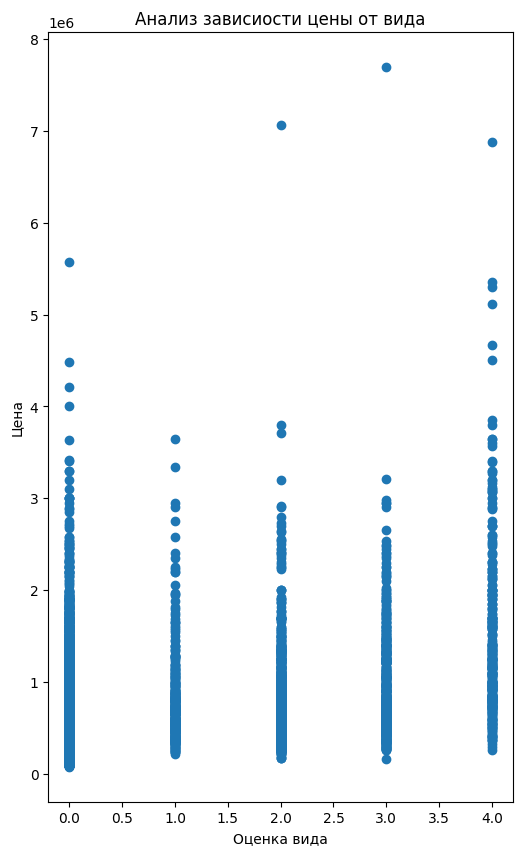

In [59]:
plt.figure(figsize=(6, 10))
plt.scatter(df['view'], df['price'])
plt.title('Анализ зависиости цены от вида')
plt.xlabel('Оценка вида')
plt.ylabel('Цена');

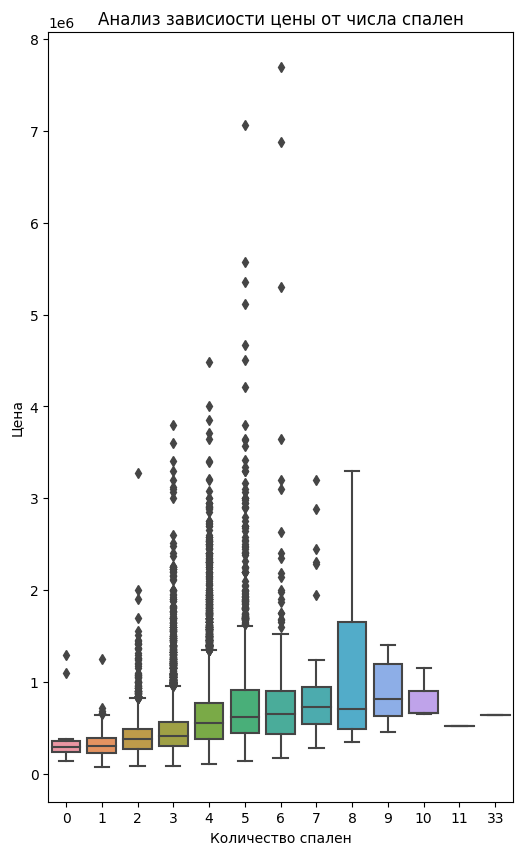

In [61]:
plt.figure(figsize=(6, 10))
sns.boxplot(x=df['bedrooms'], y=df['price'])
plt.title('Анализ зависиости цены от числа спален')
plt.xlabel('Количество спален')
plt.ylabel('Цена');